In [1]:
%load_ext autoreload
%autoreload 2


import psyplot.project as psy
import psyplot
from psy_maps.plotters import FieldPlotter
import netCDF4
import glob
import xarray as xr
import matplotlib as mpl
from netCDF4 import Dataset
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from stats import *


%matplotlib inline
%config InlineBackend.close_figures = False


print("import ok")

import ok


In [2]:
reso = "low"

data_path = "/gpfsdswork/dataset/ClimSim_low-res/train/"
filelist = [data_path + '0008-02/E3SM-MMF.mli.0008-02-0'+str(i)+'-00000.nc' for i in range(1, 10, 1)]
grid = 'scvt/ClimSim_low-res_grid-info.nc'
grid_b = '../data/nc_data/grid_with_boundaries_'+reso + 'res.nc'
nc_file = 'test.nc'
npy_pred = '../data/npy_data/prediction/first_test_prediction.npy'

var = 'ptend_t'

print(filelist)

['/gpfsdswork/dataset/ClimSim_low-res/train/0008-02/E3SM-MMF.mli.0008-02-01-00000.nc', '/gpfsdswork/dataset/ClimSim_low-res/train/0008-02/E3SM-MMF.mli.0008-02-02-00000.nc', '/gpfsdswork/dataset/ClimSim_low-res/train/0008-02/E3SM-MMF.mli.0008-02-03-00000.nc', '/gpfsdswork/dataset/ClimSim_low-res/train/0008-02/E3SM-MMF.mli.0008-02-04-00000.nc', '/gpfsdswork/dataset/ClimSim_low-res/train/0008-02/E3SM-MMF.mli.0008-02-05-00000.nc', '/gpfsdswork/dataset/ClimSim_low-res/train/0008-02/E3SM-MMF.mli.0008-02-06-00000.nc', '/gpfsdswork/dataset/ClimSim_low-res/train/0008-02/E3SM-MMF.mli.0008-02-07-00000.nc', '/gpfsdswork/dataset/ClimSim_low-res/train/0008-02/E3SM-MMF.mli.0008-02-08-00000.nc', '/gpfsdswork/dataset/ClimSim_low-res/train/0008-02/E3SM-MMF.mli.0008-02-09-00000.nc']


In [10]:
In, Out = load_ncfiles(filelist, grid_b)

In.to_netcdf(nc_file)

<xarray.Dataset>
Dimensions:     (ncol: 384, lev: 60, nvertex: 10)
Coordinates:
    lat         (ncol) float64 ...
    lon         (ncol) float64 ...
  * lev         (lev) float64 0.0 1.0 2.0 3.0 4.0 ... 55.0 56.0 57.0 58.0 59.0
    bounds_lat  (ncol, nvertex) float64 ...
    bounds_lon  (ncol, nvertex) float64 ...
Dimensions without coordinates: ncol, nvertex
Data variables:
    P0          float64 ...
    area        (ncol) float64 ...
Attributes:
    description:  test_climsim
9


In [14]:
pred = npy_toxarray(npy_pred, grid_b)
pred

(384, 128)
(1, 60, 384)


<xarray.DataArray (dim_0: 384, dim_1: 128)>
array([[-2.1118631e-03, -2.4207363e-02, -1.3806459e-02, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-5.7126591e-03, -6.8008588e-03, -6.2709111e-03, ...,
         1.2613983e-02,  1.9344801e-02,  0.0000000e+00],
       [-1.2805669e-02, -2.2106944e-02,  1.4791742e-02, ...,
         0.0000000e+00,  5.7644859e-02,  0.0000000e+00],
       ...,
       [ 1.7219670e-02, -3.5117720e-03, -2.4585001e-02, ...,
         7.6132900e-01,  2.2987801e-01,  9.6846357e-02],
       [ 4.4481209e-03,  8.9496560e-03,  1.4596138e-02, ...,
         1.0759934e+00,  2.4639514e-01,  1.3525523e-01],
       [ 1.0581753e-03,  7.5565889e-03,  1.2063675e-02, ...,
         1.0049270e+00,  2.2485410e-01,  1.1331338e-01]], dtype=float32)
Dimensions without coordinates: dim_0, dim_1

In [25]:
Out

<xarray.Dataset>
Dimensions:         (lev: 60, ncol: 384, nvertex: 10, time_counter: 9)
Coordinates:
  * lev             (lev) float64 0.0 1.0 2.0 3.0 4.0 ... 56.0 57.0 58.0 59.0
    lat             (ncol) float64 ...
    lon             (ncol) float64 ...
    bounds_lat      (ncol, nvertex) float64 ...
    bounds_lon      (ncol, nvertex) float64 ...
  * time_counter    (time_counter) int64 0 1 2 3 4 5 6 7 8
Dimensions without coordinates: ncol, nvertex
Data variables: (12/20)
    P0              float64 ...
    area            (ncol) float64 ...
    ymd             (time_counter) int32 80201 80202 80203 ... 80207 80208 80209
    tod             (time_counter) int32 0 0 0 0 0 0 0 0 0
    cam_out_FLWDS   (time_counter, ncol) float64 374.3 369.0 ... 213.6 228.5
    cam_out_NETSW   (time_counter, ncol) float64 0.0 0.0 0.0 ... 301.9 337.3
    ...              ...
    state_q0003     (time_counter, lev, ncol) float64 1.305e-11 ... 4.136e-24
    state_t         (time_counter, lev, ncol) float64 213.0 212.9 ... 271.3
    state_u         (time_counter, lev, ncol) float64 -79.4 -82.03 ... 5.425
    state_v         (time_counter, lev, ncol) float64 19.16 13.94 ... -0.5212
    ptend_t         (time_counter, lev, ncol) float64 -1.36e-05 ... -8.255e-05
    ptend_q0001     (time_counter, lev, ncol) float64 0.0 0.0 ... 3.236e-08
Attributes:
    description:  test_climsim

In [33]:
psy.rcParams['plotter.maps.xgrid'] = False
psy.rcParams['plotter.maps.ygrid'] = False
mpl.rcParams['figure.figsize'] = [8., 6.]

In [41]:
mean_t = Out.mean('time_counter', keep_attrs = True)

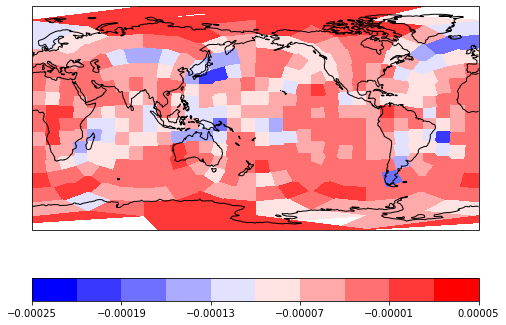

Exception ignored in atexit callback: <bound method InteractiveShell.atexit_operations of <ipykernel.zmqshell.ZMQInteractiveShell object at 0x7f89102291b0>>
Traceback (most recent call last):
  File "/gpfslocalsup/pub/anaconda-py3/2021.05/envs/tensorflow-2.9.1+py3.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3765, in atexit_operations
    self._atexit_once()
  File "/gpfslocalsup/pub/anaconda-py3/2021.05/envs/tensorflow-2.9.1+py3.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3748, in _atexit_once
    self.history_manager.end_session()
  File "/gpfslocalsup/pub/anaconda-py3/2021.05/envs/tensorflow-2.9.1+py3.10/lib/python3.10/site-packages/IPython/core/history.py", line 602, in end_session
    self.writeout_cache()
  File "/gpfslocalsup/pub/anaconda-py3/2021.05/envs/tensorflow-2.9.1+py3.10/lib/python3.10/site-packages/decorator.py", line 232, in fun
    return caller(func, *(extras + args), **kw)
  File "/gpfslocalsup/pub/anaconda-py3/

In [42]:
tmap = mean_t.psy.plot.mapplot(name=var,  lev = 59, cmap = 'bwr')